In [8]:
import numpy as np
import pylab as plt

def apply_u(u,psi,idx):
    l = len(u.shape)//2
    psi = np.tensordot(u, psi, axes=(list(range(l)), idx))
    return np.moveaxis(psi,list(range(l)),idx)

def get_state(L,type='random'):
    
    if type == 'X':
        psi = np.ones(2**L)
    elif type == 'Z':
        psi = np.zeros(2**L)
        psi[0] = 1  
    elif type == 'GHZ':
        psi = np.zeros(2**L)
        psi[0] = 1; psi[2**L-1] = 1

    return psi.reshape(L*[2])/np.linalg.norm(psi)

# this is getting the MPS representation of the state
# psi = get_state(6, type='GHZ')
# print(psi.shape)
# print(psi)


[[0.5 0.5]
 [0.5 0.5]]


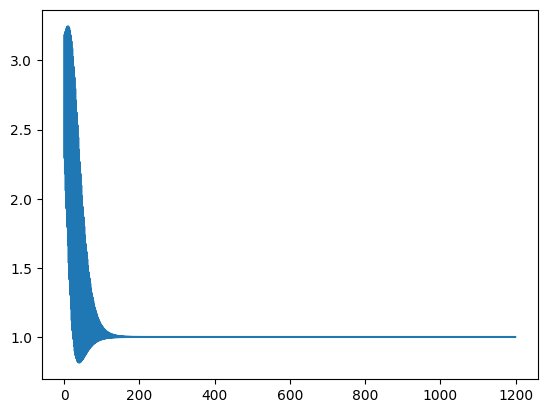

In [9]:
N = 600

H = []
H.append(np.diag([3,0,5,1]).reshape([2,2,2,2]))
H.append(np.diag([3,5,0,1]).reshape([2,2,2,2]))

psi = get_state(2, type='X')
print(psi)

for i in range(2):
    U,_ = np.linalg.qr(np.random.randn(2,2))
    psi = apply_u(U,psi,[i])


alpha = 0.1
E = []
for n in range(N):
    for i in range(2):
        j = np.mod(i+1,2) 

        dE = np.tensordot(H[i], psi.conj(), axes=([[2,3],[0,1]]))
        dE = np.tensordot(psi, dE, axes=([j],[j]))
        E.append(np.trace(dE))
        dE = np.eye(2) - alpha * dE

        Y,_,Z = np.linalg.svd(dE)

        psi = apply_u((Y@Z).T.conj(),psi,[i])

plt.plot(E)

[4.500002292308907, 4.518097462073903, 4.981887407172104, 4.500002280534647, 4.518097479251666, 4.981887467367788, 4.500002268820863, 4.518097496341683, 4.981887527255585, 4.500002257167249]


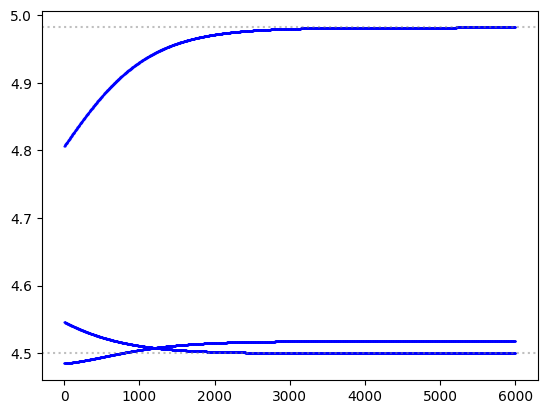

In [19]:
N = 2000
# 00 01 10 11
HA = np.diag([3,5,0,1])
HB = np.diag([3,0,5,1])

H = (np.kron(HA,np.eye(2)) + np.kron(np.eye(2),HB)).reshape([2,2,2,2,2,2])
H = [H,H.transpose(1,2,0, 4,5,3),H.transpose(2,0,1, 5,3,4)]

psi = get_state(3, type='GHZ')
np.random.seed(1)

for i in range(3):
    U,_ = np.linalg.qr(np.random.randn(2,2))
    psi = apply_u(U,psi,[i])
                       
alpha = 0.01
E = []
for n in range(N):
    for i in range(3):
        j = np.mod(i-1,3)
        k = np.mod(i+1,3)

        dE = np.tensordot(H[i], psi, axes=([[3,4,5],[0,1,2]]))
        dE = np.tensordot(psi.conj(), dE, axes=([j,k],[j,k]))
        E.append(np.trace(dE)) # just the energy
        dE = np.eye(2) - alpha * dE


        # U,s,V = np.linalg.svd(dE)

        Y,_,Z = np.linalg.svd(dE)
        psi = apply_u((Y@Z).T.conj(),psi,[i])

        # psi = apply_u((Y@Z).T.conj(),psi,[0])
        # psi = apply_u((Y@Z).T.conj(),psi,[1])
        # psi = apply_u((Y@Z).T.conj(),psi,[2])



plt.plot(E, label='Energy', color='blue', marker='.', linestyle='', markersize=1)
plt.axhline(y=4.5, color='gray', linestyle=':', alpha=0.5)
plt.axhline(y=max(E), color='gray', linestyle=':', alpha=0.5)
print(E[-10:])